EE364b Convex Optimization II, S. Boyd

Written by Shuvomoy Das Gupta

## Projected subgradient method

Projected subgradient method solves the following problem:

$$
\begin{align}
&\textrm{minimize} \quad f(x) \\
&\textrm{subject to}\quad x \in \mathcal{C},
\end{align}
$$
where $\mathcal{C}$ is a convex set. The projected subgradient algorithm is given by 

$$
\begin{align}
x^{(k+1)}=\Pi(x^{(k)}-\alpha_k g^{(k)}),
\end{align}
$$

where $\Pi$ is the Eucledian projection on $\mathcal{C}$ and $g^{(k)} \in \partial f(x^{k})$. Projected subgradient method converges for square summable but nonsummable sequence.

For an example of the projected subgradient method, we will consider the following problem

$$
\begin{align}
&\textrm{minimize} \quad \|x\|_1 \\
&\textrm{subject to}\quad A x=b.
\end{align}
$$

Subgradient of the objective is $g=\mathop{\bf sign}(x)$, and the projected subgradient update can be shown to be equal to

$$
\begin{align}
x^{(k+1)}=x^{(k)}-\alpha_k (I-A^T (A A^T)^{-1} A) \mathop{\bf sign}(x^{(k)}).
\end{align}
$$

First, we generate the problem data.

In [12]:
# Problem Data
#-------------
n=1000# Number of variables
m=50 # Number of equality constraints
A=randn(m,n)
b=randn(m,1)

50x1 Array{Float64,2}:
  0.368942  
  0.405409  
  0.125484  
  0.799402  
 -0.172438  
  0.709199  
  0.2564    
  0.395094  
  1.27792   
  0.773917  
  0.429714  
  1.17      
 -0.0753285 
  ⋮         
  2.41359   
 -0.442224  
 -1.10039   
 -0.00925451
 -0.44222   
  0.201273  
  1.94144   
 -0.526078  
 -0.105726  
  1.16626   
 -0.521875  
  0.297293  

Next, we solve the problem using `Convex` and store the result.

In [13]:
# Solving using convex
#---------------------
using Convex
using SCS
xCvx=Variable(n)
problem=minimize( norm(xCvx,1),
#     subject to
                A*xCvx==b)

solve!(problem, SCSSolver())

print(
"The status of the solution is ", problem.status,
"\nwith optimal objective value, f(x*)=", problem.optval,
)
xMinValue=xCvx.value
fMinValue=problem.optval

The status of the solution is Optimal
with optimal objective value, f(x*)=3.0009021102671483

3.0009021102671483

To implement the projected subgradient method, we will need an initial feasible point first, which is calculated as follows.

In [14]:
#Finding an initial feasible point
#--------------------------------
x1=pinv(A)*b

1000x1 Array{Float64,2}:
  0.00588643 
  0.00605333 
  0.00540244 
 -0.0122682  
 -0.00382828 
  0.00193963 
  0.00242622 
  0.00137066 
 -0.0013342  
  0.0113841  
 -0.00957948 
 -0.00230627 
  0.00353533 
  ⋮          
 -0.00774489 
  0.00632311 
  0.00665532 
  0.00112034 
 -0.00671142 
  0.00414018 
 -0.00177069 
  0.000525827
  0.00170741 
 -0.00288056 
  0.00387843 
  0.00441875 

Now we write the function that will implement projected subgradient method.

In [15]:
# Function that will implement projected subgradient method
# ---------------------------------------------------------
function proj_sub_method_l1norm(
    A::Array{Float64,2},
    b::Array{Float64,2},
    x1::Array{Float64,2},
    a::Float64,
    maxIter::Int64
    )
fSet=Float64[] # We are creating an empty array where we will store the objective values as we progress
push!(fSet,Inf) # Intial value of f is infinity

fBest=Float64[] # It is an array where the last element will give f_best^{(k)} so far
push!(fBest, Inf) # Intial best value of f is infinity
M=eye(n)-A'*inv(A*A')*A # This is the matrix that is going to be used in updating x
  # x^{(k+1)}=x_{(k)}-\alpha_{k} M g^{(k)}
k=1
x=x1
while(k < maxIter)
        if (mod(k,100)==0)
            println("Iteration number=",k)
        end
# Value of the function at kth iteration
fKval=norm(x,1)
# Subgradient of ||x||₁ is sign(x)=(sign(x₁),...,sign(xₙ))
g=(x.>0)-(x.<0)

#step size selection
α=a/k

# Push the current value of f(x^(k)) in fSet
push!(fSet,fKval)

# Note how we are pushing the best f found so far in the last element of f
push!(fBest, min(fBest[end],fKval))
# Subgradient update:
x=x-α*M*g
k=k+1
end # while
return x, fSet, fBest
end # function

proj_sub_method_l1norm (generic function with 1 method)

Let's implement the function for $\alpha = \frac{0.1}{k}$ with $3000$ iterations, it will take a while.

In [16]:
a=0.1
maxIter=3000
(x, fSet, fBest)=proj_sub_method_l1norm(A, b, x1, 0.1 , maxIter)

Iteration number=100
Iteration number=200
Iteration number=300
Iteration number=400
Iteration number=500
Iteration number=600
Iteration number=700
Iteration number=800
Iteration number=900
Iteration number=1000
Iteration number=1100
Iteration number=1200
Iteration number=1300
Iteration number=1400
Iteration number=1500
Iteration number=1600
Iteration number=1700
Iteration number=1800
Iteration number=1900
Iteration number=2000
Iteration number=2100
Iteration number=2200
Iteration number=2300
Iteration number=2400
Iteration number=2500
Iteration number=2600
Iteration number=2700
Iteration number=2800
Iteration number=2900


(
1000x1 Array{Float64,2}:
 -1.54531e-5
  3.89414e-6
  3.71402e-5
  1.31452e-5
 -3.4162e-5 
  5.74654e-6
 -1.0857e-5 
 -1.22897e-5
 -1.85702e-5
  1.26795e-5
 -0.00417956
  1.63985e-5
  2.72622e-5
  ⋮         
 -1.24167e-5
  3.96727e-5
 -6.99192e-9
  6.41982e-6
 -8.18521e-6
  4.34354e-5
  5.34967e-5
 -1.94854e-5
 -3.31469e-6
 -3.32221e-5
  4.41224e-5
 -3.87171e-6,

[Inf,5.57037,51.301,25.3956,15.3045,13.0994,10.6125,9.28978,8.45513,8.07397  …  3.03905,3.03912,3.03915,3.03864,3.03944,3.03855,3.03915,3.03902,3.03878,3.03883],[Inf,5.57037,5.57037,5.57037,5.57037,5.57037,5.57037,5.57037,5.57037,5.57037  …  3.03859,3.03859,3.03859,3.03859,3.03859,3.03855,3.03855,3.03855,3.03855,3.03855])

Finally we plot optimality gap versus $k$.

In [17]:
#Plotting time # For some reason, Winston plot is throwing error, need to look into that later
#-------------
#using Winston
#iters=[1:maxIter]
#figProjSub = FramedPlot(
#title="The value of f_{best}^{(k)} - f^{*} vs. iteration number",
#         xlabel="k",
#         ylabel="f_{best}^{(k)} - f^{*}",
#yrange=(1e-2,1e0),
#ylog=true
#)
#xAxis=iters
#curve1=fBest-fMinValue
#bl=Curve(xAxis, curve1, color="blue")
#setattr(bl, label="0.1/k")
#le=Legend(.1,.1,{bl})
#add(figProjSub,bl)

In [18]:
# Trying in Gadfly
# Pkg.add("Gadfly")

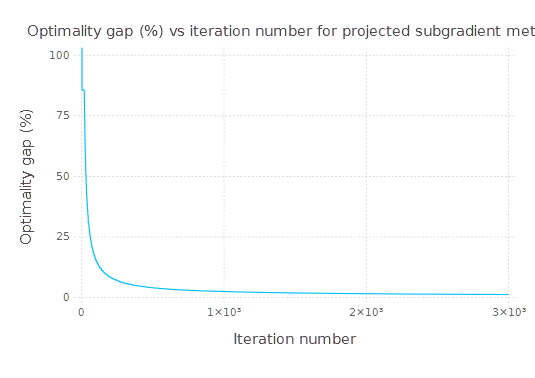

In [19]:
using Gadfly
curve1=abs((fBest-fMinValue)./fMinValue)*100
iters=[1:maxIter]
plot(
x=iters, 
y=curve1, 
Guide.ylabel("Optimality gap (%)"), # label for y-axis
Guide.xlabel("Iteration number"),  # label for x-axis
Guide.title("Optimality gap (%) vs iteration number for projected subgradient method"),  # a title
Geom.line
)